<a href="https://colab.research.google.com/github/HappyGithub-dev/LocalRepo/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

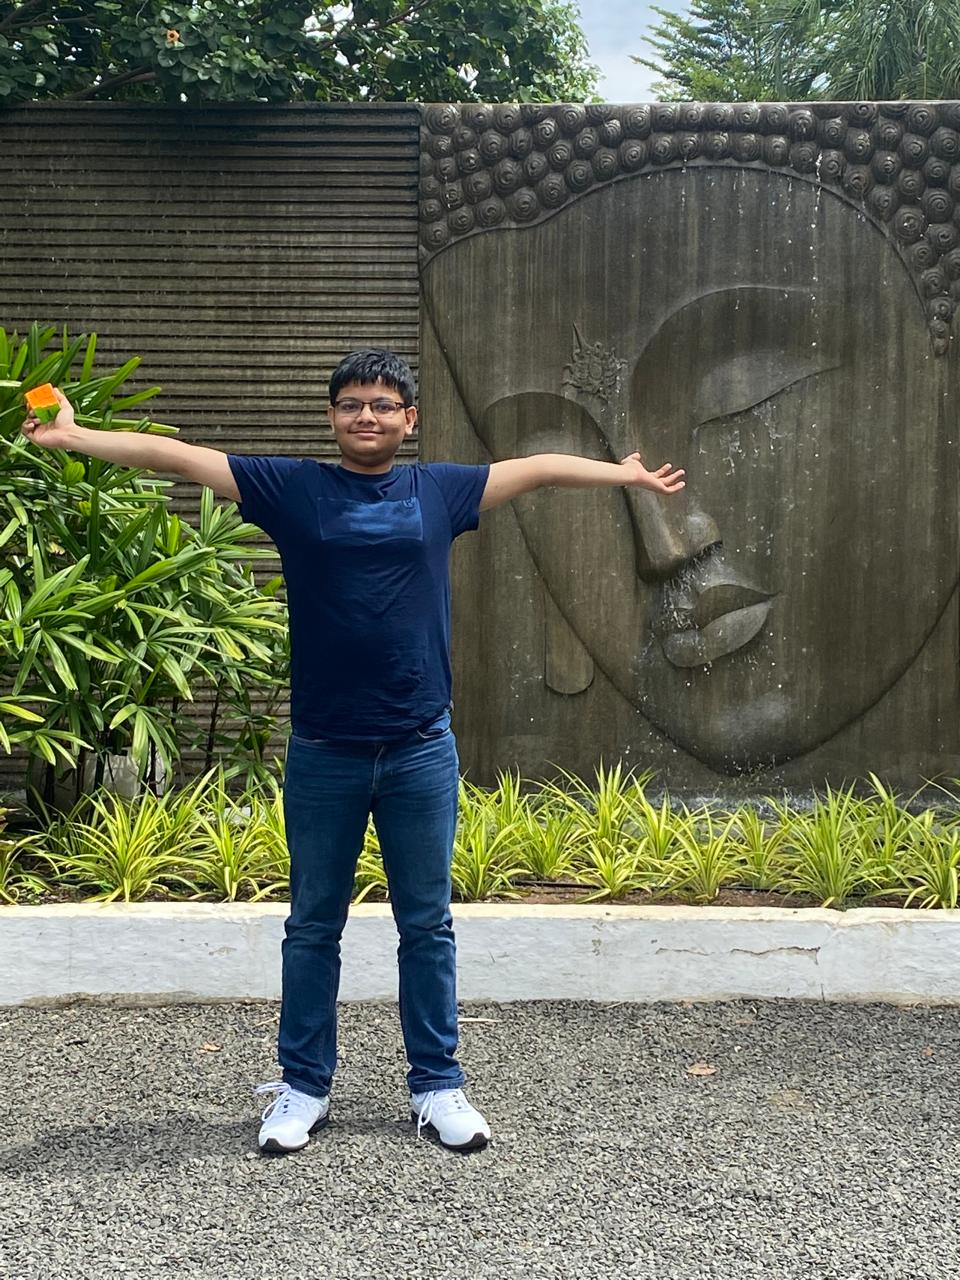

-1

In [ ]:
img = cv2.imread("/content/HarshWCA.jpeg")
cv2_imshow(img)
cv2.waitKey(0)

Object files

In [ ]:
classNames = []
classFile = 'coco.names'

with open(classFile,'rt') as f:
  classNames = f.read().rstrip('\n').split('\n')

In [ ]:
print(classNames)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


Relevant files for preparing the neural network.

In [ ]:
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightsPath = 'frozen_inference_graph.pb'

The neural Network

In [ ]:
NN = cv2.dnn_DetectionModel(weightsPath,configPath)
NN.setInputSize(320,320)
NN.setInputScale(1.0/127.5)
NN.setInputMean((127.5,127.5,127.5))
NN.setInputSwapRB(True)

< cv2.dnn.Model 0x7f58b6130890>

In [ ]:
classIds , confs , bbox = NN.detect(img,confThreshold=0.5)
print(classIds,bbox)

[1] [[ 19 350 686 815]]


In [ ]:
for classId, confidence, box in zip(classIds.flatten(),confs.flatten(),bbox):
  x,y,w,h = box
  cv2.rectangle(img,box,color=(0,255,0),thickness=2)
  cv2.putText(img,classNames[classId-1].upper(),(box[0]+10,box[1]+30),
              cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

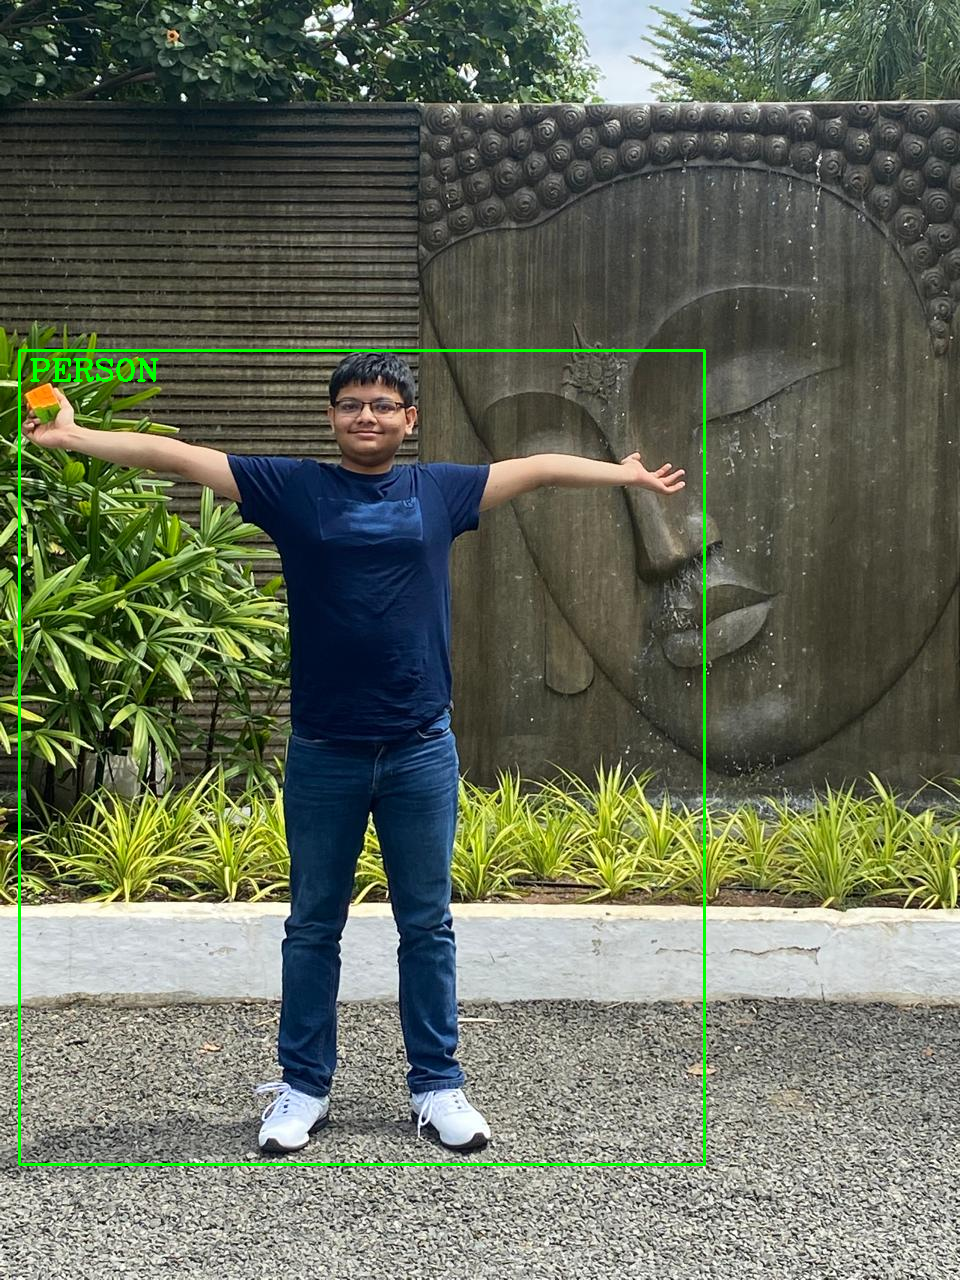

-1

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)